In [5]:
import os 
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sys
sys.path.append('../..')
from data.data_loader import get_splits
from utils.plot import plot_2D

# Reading and displaying data from file full_encoded.csv
dataFull = get_splits('../../data/encoded_data/full_encoded.csv', 0.2)

X_trainFull = dataFull['X_train']
y_trainFull = dataFull['Y_train']
X_testFull = dataFull['X_test']
y_testFull = dataFull['Y_test']

display(X_trainFull)
display(y_trainFull)
display(X_testFull)
display(y_testFull)




starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,condition,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
95534,0.152381,0.50,0.500000,0.016800,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71819,0.076190,0.50,0.333333,0.010640,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116381,0.076190,0.75,0.666667,0.014000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90825,0.076190,0.25,0.333333,0.015806,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113829,0.066667,0.75,0.333333,0.006000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63080,0.142857,0.75,0.500000,0.010990,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51724,0.066667,0.25,0.333333,0.009300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37632,0.047619,0.75,0.500000,0.003600,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31764,0.152381,0.50,0.500000,0.008400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


95534     9.722144e-07
71819     3.043864e-06
116381    3.888858e-06
90825     9.722144e-07
113829    3.609693e-06
              ...     
63080     9.166593e-07
51724     3.888858e-07
37632     9.166593e-06
31764     1.527766e-06
102535    1.319434e-06
Name: price, Length: 94037, dtype: float64

,year,condition,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
8869,0.152381,0.75,0.666667,0.021612,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
82926,0.123810,1.00,0.500000,0.011161,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60279,0.057143,0.75,0.333333,0.004251,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78249,0.057143,0.50,0.250000,0.005446,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16913,0.114286,0.50,0.666667,0.016089,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93236,0.133333,0.50,0.500000,0.014527,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76192,0.104762,0.75,0.666667,0.021607,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42359,0.057143,0.75,0.500000,0.005556,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13250,0.142857,0.75,0.500000,0.015700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


8869     1.387489e-06
82926    2.493591e-06
60279    2.777755e-06
78249    1.666376e-06
16913    1.249990e-06
             ...     
93236    9.583256e-07
76192    3.609693e-06
42359    6.194395e-06
13250    1.055547e-06
46158    5.274958e-06
Name: price, Length: 23510, dtype: float64

In [45]:
X_trainFull,X_valFull,y_trainFull,y_valFull = train_test_split(X_trainFull, y_trainFull, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_trainFull.shape[0]))
print("Validation set has an example of {}.".format(X_valFull.shape[0]))
print("The test set has an example of {}.".format(X_testFull.shape[0]))

X_trainFull=np.array(X_trainFull) #lists are converted to numpy arrays
y_trainFull=np.array(y_trainFull)
X_valFull=np.array(X_valFull)
y_valFull=np.array(y_valFull)
X_testFull=np.array(X_testFull)
y_testFull=np.array(y_testFull)

The train set has an example of 70527.
Validation set has an example of 23510.
The test set has an example of 23510.


In [96]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
from keras.optimizers import adam

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'

# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()

"""# Neural network layers are created with RELU activation
price_predictor.add(Dense(128,activation='relu', input_dim=808))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()"""
# Neural network layers are created with RELU activation
price_predictor.add(Dense(256,activation='relu', input_dim=808))  
price_predictor.add(Dense(128,activation='relu'))
price_predictor.add(Dense(64,activation='relu'))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()


# Array used to store test errors
test_errs = []
opt = adam(lr=0.00001)

# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
i=0;

history = price_predictor.fit(X_trainFull, y_trainFull, validation_data=(X_valFull, y_valFull), epochs=100, batch_size=500, callbacks=[checkpointer], verbose=0)
price_predictor.load_weights('price_prediction.hdf5')
TestscoreFull=price_predictor.evaluate(X_testFull,y_testFull,verbose=1)
display("The final model scores {} for test data.".format(TestscoreFull))
test_errs.append(TestscoreFull)
    
price_predictionFull=price_predictor.predict(X_testFull)
display(price_predictionFull)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 256)               207104    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 9         
Total params: 250,609
Trainable params: 250,609
Non-trainable params: 0
_________________________________________________________________

Epo


Epoch 00076: val_loss improved from 0.00071 to 0.00069, saving model to price_prediction.hdf5

Epoch 00077: val_loss improved from 0.00069 to 0.00067, saving model to price_prediction.hdf5

Epoch 00078: val_loss improved from 0.00067 to 0.00066, saving model to price_prediction.hdf5

Epoch 00079: val_loss improved from 0.00066 to 0.00064, saving model to price_prediction.hdf5

Epoch 00080: val_loss improved from 0.00064 to 0.00063, saving model to price_prediction.hdf5

Epoch 00081: val_loss did not improve

Epoch 00082: val_loss improved from 0.00063 to 0.00061, saving model to price_prediction.hdf5

Epoch 00083: val_loss improved from 0.00061 to 0.00059, saving model to price_prediction.hdf5

Epoch 00084: val_loss improved from 0.00059 to 0.00058, saving model to price_prediction.hdf5

Epoch 00085: val_loss improved from 0.00058 to 0.00057, saving model to price_prediction.hdf5

Epoch 00086: val_loss improved from 0.00057 to 0.00055, saving model to price_prediction.hdf5

Epoch 0008

'The final model scores [0.00043769701606489444, 0.0] for test data.'

array([[-3.9424922e-04],
       [ 5.5274565e-04],
       [-5.2122283e-05],
       ...,
       [ 7.7029807e-05],
       [ 1.5411351e-04],
       [ 1.9898755e-05]], dtype=float32)

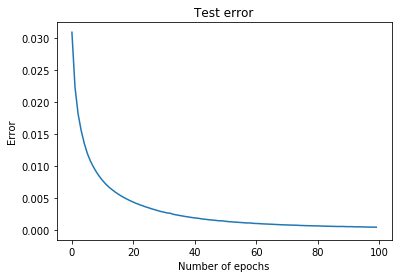

In [97]:
plt.title("Test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(test_errs, 'r')
plt.plot(history.history['val_loss'])
plt.show()

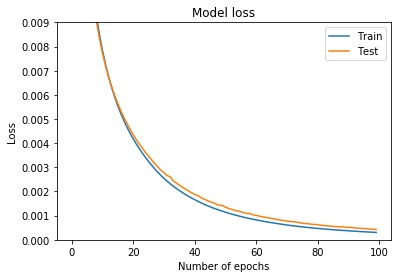

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.ylim(-0,0.009)
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

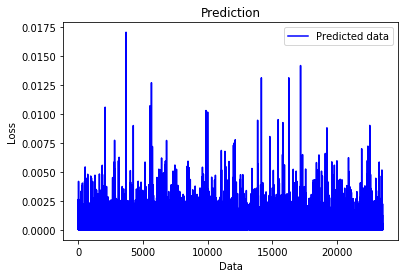

In [102]:
plt.plot(abs(price_predictionFull), color = 'blue', label = 'Predicted data')
plt.ylabel('Loss')
plt.xlabel('Data')
plt.title('Prediction')
plt.legend()
plt.show()

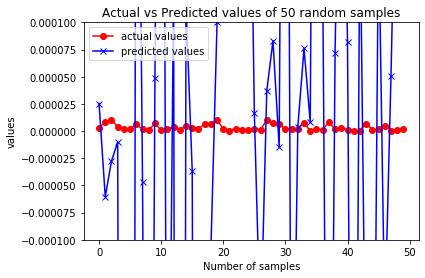

In [117]:
import random
num_samples=50
idx=random.sample(range(len(y_testFull)),num_samples) 
plt.plot(range(num_samples),y_testFull[idx],'ro-')
plt.plot(range(num_samples),price_predictionFull[idx],'bx-')
plt.ylim(-0.0001,0.0001) 
plt.ylabel("values")
plt.xlabel("Number of samples")
plt.title('Actual vs Predicted values of 50 random samples')
plt.legend(["actual values",'predicted values'])

In [116]:
r=0
error=[]
while(r<len(y_testFull)):
    err = abs(y_testFull[r]-price_predictionFull[r])
    error.append(err)
    r=r+1
display(np.mean(error))

0.000437697

In [36]:
# Reading and displaying data from file autotrader_encoded.csv
dataAuto = get_splits('../../data/encoded_data/autotrader_encoded.csv', 0.2)

X_trainAuto = dataAuto['X_train']
y_trainAuto = dataAuto['Y_train']
X_testAuto = dataAuto['X_test']
y_testAuto = dataAuto['Y_test']

display(X_trainAuto)
display(y_trainAuto)
display(X_testAuto)
display(y_testAuto)


starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,model_YARIS,model_Yukon,model_Yukon XL,model_Yukon XL Denali,model_Z3,model_Z4,model_ZDX,model_Zephyr,model_d'Elegance,model_del Sol
70969,0.133333,0.75,0.024751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90340,0.050000,0.75,0.018717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138622,0.033333,0.50,0.014044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53825,0.133333,0.75,0.000019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40175,0.075000,0.75,0.009705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126949,0.116667,0.50,0.036500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162846,0.075000,0.50,0.012700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113655,0.066667,0.50,0.012100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27808,0.091667,0.75,0.012000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


70969     0.000002
90340     0.000005
138622    0.000003
53825     0.000001
40175     0.000007
            ...   
126949    0.000002
162846    0.000008
113655    0.000002
27808     0.000003
73012     0.000001
Name: price, Length: 157491, dtype: float64

,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,model_YARIS,model_Yukon,model_Yukon XL,model_Yukon XL Denali,model_Z3,model_Z4,model_ZDX,model_Zephyr,model_d'Elegance,model_del Sol
26019,0.058333,0.50,0.008091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15699,0.116667,0.50,0.021387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108011,0.066667,1.00,0.006300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83116,0.175000,0.75,0.015469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4260,0.125000,0.75,0.022000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128047,0.041667,0.75,0.007201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128783,0.125000,0.50,0.019800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173945,0.125000,0.50,0.009700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72064,0.066667,0.75,0.013300,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


26019     5.416623e-06
15699     3.333307e-06
108011    4.998571e-06
83116     2.749978e-06
4260      1.805541e-06
              ...     
128047    1.944151e-06
128783    5.555511e-07
173945    6.930500e-07
72064     2.219427e-06
99523     3.331918e-06
Name: price, Length: 39373, dtype: float64

In [37]:
X_trainAuto,X_valAuto,y_trainAuto,y_valAuto = train_test_split(X_trainAuto, y_trainAuto, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_trainAuto.shape[0]))
print("Validation set has an example of {}.".format(X_valAuto.shape[0]))
print("The test set has an example of {}.".format(X_testAuto.shape[0]))

X_trainAuto=np.array(X_trainAuto) #lists are converted to numpy arrays
y_trainAuto=np.array(y_trainAuto)
X_valAuto=np.array(X_valAuto)
y_valAuto=np.array(y_valAuto)
X_testAuto=np.array(X_testAuto)
y_testAuto=np.array(y_testAuto)

The train set has an example of 118118.
Validation set has an example of 39373.
The test set has an example of 39373.


In [82]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
from keras.optimizers import adam

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'

# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()

"""# Neural network layers are created with RELU activation
price_predictor.add(Dense(128,activation='relu', input_dim=755))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()"""
# Neural network layers are created with RELU activation
price_predictor.add(Dense(256,activation='relu', input_dim=755))  
price_predictor.add(Dense(128,activation='relu'))
price_predictor.add(Dense(64,activation='relu'))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()


# Array used to store test errors
test_errs = []
opt = adam(lr=0.00001)

# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
i=0;

history = price_predictor.fit(X_trainAuto, y_trainAuto, validation_data=(X_valAuto, y_valAuto), epochs=100, batch_size=500, callbacks=[checkpointer], verbose=0)
price_predictor.load_weights('price_prediction.hdf5')
TestscoreAuto=price_predictor.evaluate(X_testAuto,y_testAuto,verbose=0)
display("The final model scores {} for test data.".format(TestscoreAuto))
test_errs.append(TestscoreAuto)
    
price_predictionAuto=price_predictor.predict(X_testAuto)
display(price_predictionAuto)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               193536    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 9         
Total params: 237,041
Trainable params: 237,041
Non-trainable params: 0
_________________________________________________________________

Epo

'The final model scores [7.066273380203351e-05, 0.0] for test data.'

array([[ 1.1068172e-05],
       [-1.7710161e-05],
       [ 1.4503821e-05],
       ...,
       [-1.0488220e-05],
       [ 3.2469965e-05],
       [-5.7101846e-05]], dtype=float32)

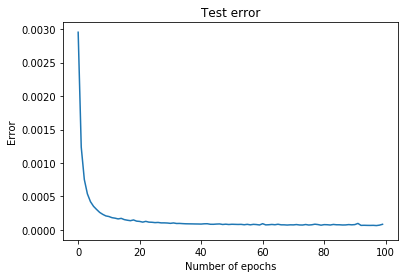

In [83]:
plt.title("Test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(test_errs, 'r')
plt.plot(history.history['val_loss'])
plt.show()

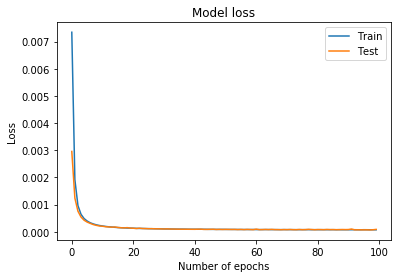

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

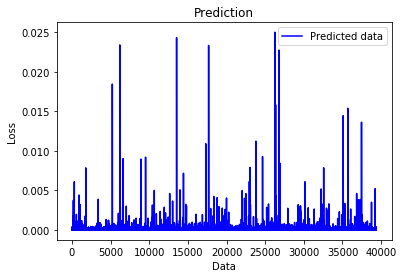

In [94]:
plt.plot(abs(price_predictionAuto), color = 'blue', label = 'Predicted data')
plt.ylabel('Loss')
plt.xlabel('Data')
plt.title('Prediction')
plt.legend()
plt.show()

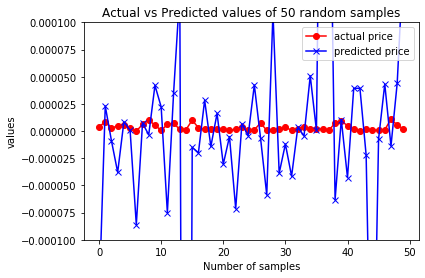

In [114]:
import random
num_samples=50
idx=random.sample(range(len(y_testAuto)),num_samples) 
plt.plot(range(num_samples),y_testAuto[idx],'ro-')
plt.plot(range(num_samples),price_predictionAuto[idx],'bx-')
plt.ylim(-0.0001,0.0001) 
plt.ylabel("values")
plt.xlabel("Number of samples")
plt.title('Actual vs Predicted values of 50 random samples')
plt.legend(["actual price",'predicted price'])

In [87]:
r=0
error=[]
while(r<len(y_testAuto)):
    err = abs(y_testAuto[r]-price_predictionAuto[r])
    error.append(err)
    r=r+1
display(np.mean(error))

7.066273e-05

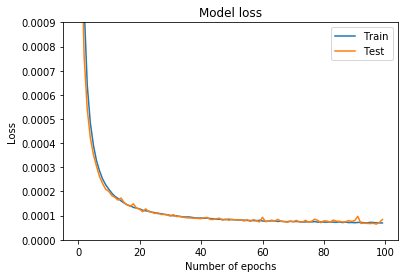

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.ylim(-0,0.0009) 
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [6]:
# Reading and displaying data from file mechanical_encoded.csv
dataMech = get_splits('../../data/encoded_data/mechanical_encoded.csv', 0.2)

X_trainMech = dataMech['X_train']
y_trainMech = dataMech['Y_train']
X_testMech = dataMech['X_test']
y_testMech = dataMech['Y_test']

display(X_trainMech)
display(y_trainMech)
display(X_testMech)
display(y_testMech)

starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,cylinders,odometer,fuel_DIESEL,fuel_ELECTRIC,fuel_GAS,fuel_HYBRID,transmission_AUTOMATIC,transmission_MANUAL,drive_4WD,...,paint_color_BROWN,paint_color_CUSTOM,paint_color_GREEN,paint_color_GREY,paint_color_ORANGE,paint_color_PURPLE,paint_color_RED,paint_color_SILVER,paint_color_WHITE,paint_color_YELLOW
91802,0.047619,0.500000,0.010700,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
143033,0.085714,0.500000,0.008941,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
147244,0.104762,0.333333,0.011500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132354,0.057143,0.333333,0.006900,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2894,0.104762,0.333333,0.011009,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84704,0.009524,0.500000,0.001252,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
68694,0.057143,0.666667,0.009111,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33274,0.142857,0.500000,0.025780,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
115955,0.266667,0.500000,0.027000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


91802     5.833287e-06
143033    4.135522e-06
147244    1.361100e-06
132354    1.569432e-06
2894      4.305521e-06
              ...     
84704     9.441591e-06
68694     6.387449e-06
33274     7.777715e-07
115955    1.388878e-07
83075     7.638828e-06
Name: price, Length: 120888, dtype: float64

,year,cylinders,odometer,fuel_DIESEL,fuel_ELECTRIC,fuel_GAS,fuel_HYBRID,transmission_AUTOMATIC,transmission_MANUAL,drive_4WD,...,paint_color_BROWN,paint_color_CUSTOM,paint_color_GREEN,paint_color_GREY,paint_color_ORANGE,paint_color_PURPLE,paint_color_RED,paint_color_SILVER,paint_color_WHITE,paint_color_YELLOW
113911,0.057143,0.500000,0.010078,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95746,0.095238,0.666667,0.011571,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
121472,0.076190,0.333333,0.010145,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149539,0.171429,0.333333,0.020000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
65127,0.095238,0.500000,0.014200,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84502,0.028571,0.333333,0.013472,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11708,0.085714,0.333333,0.009769,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
91193,0.085714,0.666667,0.012193,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92994,0.123810,0.500000,0.012800,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


113911    4.138856e-06
95746     7.222164e-07
121472    1.801652e-06
149539    7.777715e-07
65127     2.220816e-06
              ...     
84502     2.693034e-06
11708     2.359703e-06
91193     3.886080e-06
92994     1.180546e-06
62887     3.052753e-06
Name: price, Length: 30222, dtype: float64

In [7]:
X_trainMech,X_valMech,y_trainMech,y_valMech = train_test_split(X_trainMech, y_trainMech, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_trainMech.shape[0]))
print("Validation set has an example of {}.".format(X_valMech.shape[0]))
print("The test set has an example of {}.".format(X_testMech.shape[0]))

X_trainMech=np.array(X_trainMech) #lists are converted to numpy arrays
y_trainMech=np.array(y_trainMech)
X_valMech=np.array(X_valMech)
y_valMech=np.array(y_valMech)
X_testMech=np.array(X_testMech)
y_testMech=np.array(y_testMech)

The train set has an example of 90666.
Validation set has an example of 30222.
The test set has an example of 30222.


In [75]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
from keras.optimizers import adam

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'

# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()

# Neural network layers are created with RELU activation
price_predictor.add(Dense(256,activation='relu', input_dim=35))  
price_predictor.add(Dense(128,activation='relu'))
price_predictor.add(Dense(64,activation='relu'))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()


# Array used to store test errors
test_errs = []
opt = adam(lr=0.00001)

# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
i=0;

history = price_predictor.fit(X_trainMech, y_trainMech, validation_data=(X_valMech, y_valMech), epochs=100, batch_size=500, callbacks=[checkpointer], verbose=0)
price_predictor.load_weights('price_prediction.hdf5')
TestscoreMech=price_predictor.evaluate(X_testMech,y_testMech,verbose=0)
display("The final model scores {} for test data.".format(TestscoreMech))
test_errs.append(TestscoreMech)
    
price_predictionMech=price_predictor.predict(X_testMech)
display(price_predictionMech)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               9216      
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 9         
Total params: 52,721
Trainable params: 52,721
Non-trainable params: 0
_________________________________________________________________

Epoch


Epoch 00095: val_loss did not improve

Epoch 00096: val_loss did not improve

Epoch 00097: val_loss improved from 0.00025 to 0.00024, saving model to price_prediction.hdf5

Epoch 00098: val_loss did not improve

Epoch 00099: val_loss did not improve

Epoch 00100: val_loss improved from 0.00024 to 0.00024, saving model to price_prediction.hdf5


'The final model scores [0.000253700788757557, 0.0] for test data.'

array([[-1.1045858e-04],
       [-1.2616068e-04],
       [-7.3894858e-05],
       ...,
       [-3.6541373e-05],
       [ 1.2095096e-03],
       [-7.9829246e-05]], dtype=float32)

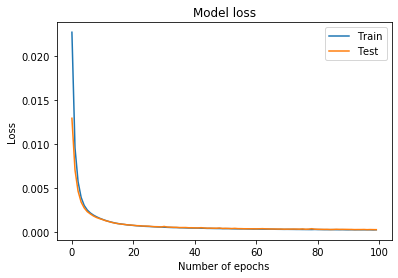

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

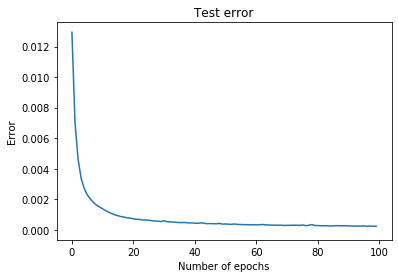

In [77]:
import matplotlib.pyplot as plt
plt.title("Test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(test_errs, 'r')
plt.plot(history.history['val_loss'])
plt.show()

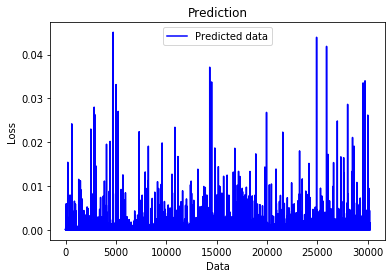

In [95]:
plt.plot(abs(price_predictionMech), color = 'blue', label = 'Predicted data')
plt.ylabel('Loss')
plt.xlabel('Data')
plt.title('Prediction')
plt.legend()
plt.show()

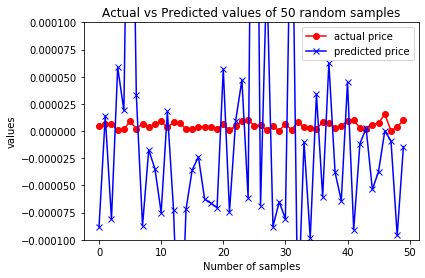

In [119]:
import random
num_samples=50
idx=random.sample(range(len(y_testMech)),num_samples) 
plt.plot(range(num_samples),y_testMech[idx],'ro-')
plt.plot(range(num_samples),price_predictionMech[idx],'bx-')
plt.ylim(-0.0001,0.0001) 
plt.ylabel("values")
plt.xlabel("Number of samples")
plt.title('Actual vs Predicted values of 50 random samples')
plt.legend(["actual price",'predicted price'])

In [80]:
r=0
error=[]
while(r<len(y_testMech)):
    err = abs(y_testMech[r]-price_predictionMech[r])
    error.append(err)
    r=r+1
display(np.mean(error))

0.0002537008

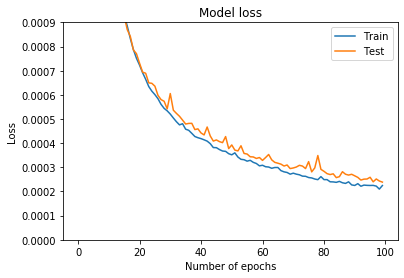

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.ylim(-0,0.0009) 
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()